In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
# Training Data, 6 datasets and only 50 days of the test data
Data_sets = [
    'D19_cumulative_encoded.csv', 'D21_cumulative_encoded.csv', 'GP21_cumulative_encoded.csv',
    'MSE21_cumulative_encoded.csv', 'NP21_cumulative_encoded.csv', 'SRM22_cumulative_encoded.csv'
]
test_data = pd.read_csv('SRM23_cumulative_encoded.csv') 
test_data1 = test_data[:50] # Test data 1 is the number of tickets hypothetically already sold
dataframes = []
for file in Data_sets:
    dataframes.append(pd.read_csv(file))
df = pd.concat(dataframes, axis=0)
new_df = [df,test_data1]
df = pd.concat(new_df, axis=0)
print(df)

   Created Date  Cumulative Attendance Count
0    2019-07-16                          102
1    2019-07-30                          204
2    2019-07-31                          223
3    2019-08-01                          225
4    2019-08-02                          226
..          ...                          ...
45   2023-05-07                          315
46   2023-05-09                          322
47   2023-05-12                          333
48   2023-05-15                          347
49   2023-05-16                          357

[486 rows x 2 columns]


In [3]:
df = df.rename(columns={'Created Date': 'ds', 'Cumulative Attendance Count': 'y'})
df

,ds,y
0,2019-07-16,102
1,2019-07-30,204
2,2019-07-31,223
3,2019-08-01,225
4,2019-08-02,226
...,...,...
45,2023-05-07,315
46,2023-05-09,322
47,2023-05-12,333
48,2023-05-15,347


In [4]:
m = Prophet()
m.fit(df)

18:51:55 - cmdstanpy - INFO - Chain [1] start processing
18:51:55 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
forecast = m.predict(df)
predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(predictions)

            ds        yhat  yhat_lower  yhat_upper
0   2019-07-16  633.705617  268.752627  962.096650
1   2019-07-30  289.993482  -60.599133  646.000411
2   2019-07-31  277.204581  -66.063387  609.960373
3   2019-08-01  278.269615  -77.318051  627.445561
4   2019-08-02  293.644092  -64.468371  626.160589
..         ...         ...         ...         ...
481 2023-05-07  275.374933  -54.629375  629.168068
482 2023-05-09  259.366243  -75.418699  602.383042
483 2023-05-12  326.973005  -28.811298  687.673536
484 2023-05-15  325.575314  -11.627180  645.996361
485 2023-05-16  351.937243    2.686430  693.335418

[486 rows x 4 columns]


In [7]:
# calculate how many days to predict in the future, (period)
df['ds'] = pd.to_datetime(df['ds'])
last_date = df['ds'].max()
end_date_str = input("Enter last date of event (YYYY-MM-DD): ")
end_date = datetime.strptime(end_date_str, '%Y-%m-%d')
periods = (end_date - last_date).days
periods

Enter last date of event (YYYY-MM-DD):  2023-07-18


63

In [8]:
future_dataframe = m.make_future_dataframe(periods=periods)
future_dataframe = future_dataframe[future_dataframe['ds'] > last_date]

forecast = m.predict(future_dataframe )
result = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print(result)

           ds        yhat  yhat_lower  yhat_upper
58 2023-07-14  105.056577 -231.730616  440.195909
59 2023-07-15   91.951741 -261.646001  440.517872
60 2023-07-16   44.837957 -328.236308  399.526435
61 2023-07-17  -54.212591 -400.251007  271.390147
62 2023-07-18  -75.221279 -417.269012  250.283629


C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


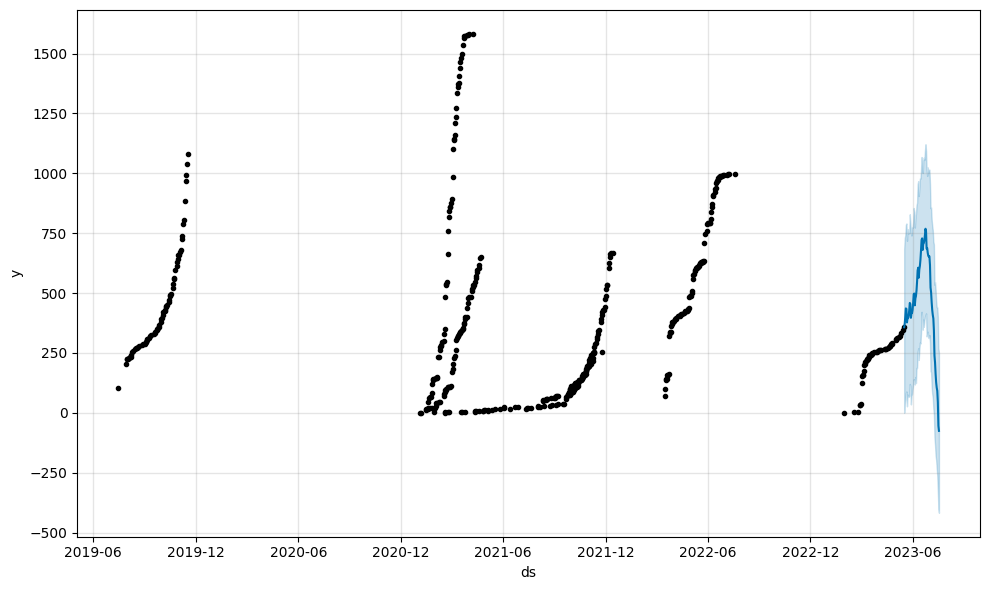

In [9]:
fig1 = m.plot(forecast)

In [10]:
# Actual sold, this dataset is to be used to compare the forecasted vs actual 
test_data2 = test_data[50:]
test_data2= test_data2.rename(columns={'Created Date': 'ds', 'Cumulative Attendance Count': 'y'})
test_data2


,ds,y
50,2023-05-17,376
51,2023-05-18,401
52,2023-05-19,412
53,2023-05-20,414
54,2023-05-21,417
55,2023-05-22,435
56,2023-05-23,500
57,2023-05-24,569
58,2023-05-25,587
59,2023-05-26,595


In [12]:
test_data2['ds'] = pd.to_datetime(test_data2['ds'])
merged_data = test_data2[['ds', 'y']].merge(forecast[['ds', 'yhat']], on='ds', how='left')
merged_data

,ds,y,yhat
0,2023-05-17,376,357.378432
1,2023-05-18,401,373.728979
2,2023-05-19,412,401.556987
3,2023-05-20,414,436.007758
4,2023-05-21,417,434.029741
5,2023-05-22,435,377.585513
6,2023-05-23,500,396.608402
7,2023-05-24,569,395.237011
8,2023-05-25,587,405.542837
9,2023-05-26,595,428.312755


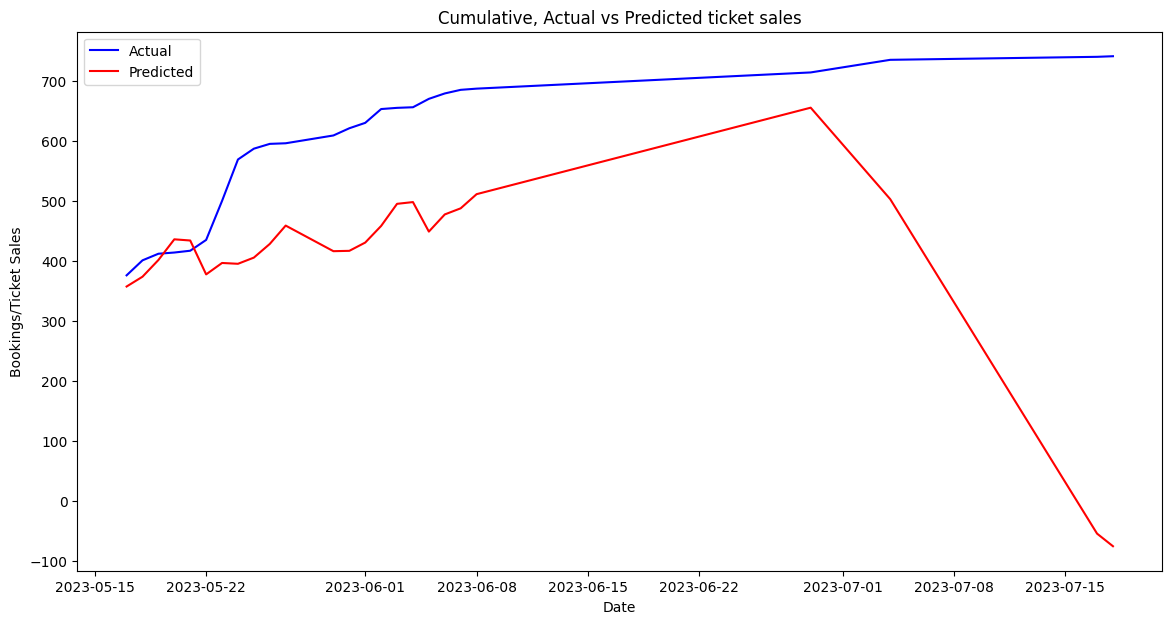

In [13]:
# Plotting the actual vs predicted
plt.figure(figsize=(14, 7))
plt.plot(merged_data['ds'], merged_data['y'], label='Actual', color='blue')
plt.plot(merged_data['ds'], merged_data['yhat'], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Bookings/Ticket Sales')
plt.title('Cumulative, Actual vs Predicted ticket sales')
plt.legend()
plt.savefig('Cumsales.jpg', bbox_inches='tight')
plt.show()

In [58]:
# The predicted number of tickets sold vs the actual
Actual = merged_data['y'].max()
Predicted1 = merged_data['yhat'].iloc[-1]
print(f'Predicted total tickets sold: {Predicted}')
print(f'Actual total tickets sold:: {Actual}')

Predicted total tickets sold: -75.22127851942969
Actual total tickets sold:: 741


In [59]:
# filter for forecasted data based on each day tickets were sold in the test_data
predicted = forecast[forecast['ds'].isin(test_data2['ds'])]

# Extract predicted and actual values
y_pred = predicted['yhat']
y_true = test_data2['y']

# Calculate evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)  # RMSE

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 188.84503334381242
Mean Squared Error (MSE): 73854.45652162428
Root Mean Squared Error (RMSE): 271.76176427456505


C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [60]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape = 100 * (abs(y_true - y_pred) / y_true).mean()
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

Mean Absolute Percentage Error (MAPE): 110.51%
